# RDV Trends

This notebook provides an example of how to read in Skylight data and produce graphs and maps to assess patterns in time and location for both dark and standard RDV events. <br/>

### Steps for RDV Analysis
1.) Build out a vessel network for vessels in a certain location </br>
2.) Use network to explore potential vessel(s) of interest </br>
3.) Create subgraph of vessel(s) of interest </br>
4.) Discover patterns in time/location </br>

Author: Virginia Chriscoe (virginia.chriscoe@gdit.com)</br>
Last Modified: 3/27/2023

In [1]:
# Import libraries
# These libraries can installed using the requirements.txt file in the base directory
import pandas as pd
import os
import sys
import datetime
sys.path.append("../")
from vesnet.network import get_network, get_hops, get_subgraph
from vesnet.plots import get_plots, get_map

In [20]:
# Read in csv file from the data directory. Data can include both dark and/or standard RDV Events
frame.head()
path = '../data/standard_dark_rdv_events_pan_2020_23.csv'
frame = pd.read_csv(path)

# Replace missing mmsi and vessel names with unknown
c=max(frame['vessels.vessel_1.mmsi'] + 1)
for i, r in frame.iterrows():
    if r['event_type']=='dark_rendezvous':
        # r['vessels.vessel_1.mmsi'] = c
        frame.at[i,'vessels.vessel_1.mmsi'] = c
        frame.at[i,'vessels.vessel_1.name'] = 'Unknown_dark_rdv_'+str(c)
        frame.at[i,'vessels.vessel_1.vessel_id'] = 'Unknown_dark_rdv_'+str(c)
        c+=1

frame['vessels.vessel_0.mmsi'] = frame['vessels.vessel_0.mmsi'].astype(int)
frame['vessels.vessel_1.mmsi'] = frame['vessels.vessel_1.mmsi'].astype(int)
frame.head()

Unnamed: 0                                           event_id  \
0           0  A:2:B:353946000:1569143992:1005476:999136:B:44...   
1           1  osr:B:373054000:1573295189:3362883:1361757:158...   
2           2  osr:B:357586000:1566665279:1817584:710889:1582...   
3           3  A:2:B:356470000:1576713756:682288:727626:B:412...   
4           4  osr:B:371531000:1509558811:2838166:963700:1582...   

            event_type                 start.time  start.point.lat  \
0  standard_rendezvous  2020-02-19T01:02:08+00:00       -46.434533   
1      dark_rendezvous  2020-02-19T01:35:29+00:00        33.107627   
2      dark_rendezvous  2020-02-19T01:35:34+00:00         6.723813   
3  standard_rendezvous  2020-02-19T01:35:56+00:00       -15.804773   
4      dark_rendezvous  2020-02-19T01:39:04+00:00         4.613333   

   start.point.lon                   end.time vessels.vessel_0.country_filter  \
0       -60.279707  2020-02-19T03:08:29+00:00                         ['PAN']   
1       136.927680  2020-02-19T03:55:46+00:00                         ['PAN']   
2       140.211493  2020-02-19T02:06:00+00:00                         ['PAN']   
3      -120.582320  2020-02-19T05:31:51+00:00                         ['PAN']   
4       112.618333  2020-02-19T12:35:59+00:00                         ['PAN']   

  vessels.vessel_0.display_country vessels.vessel_0.name  ...  \
0                           Panama               Unknown  ...   
1                           Panama            NEMRUT BAY  ...   
2                           Panama          OCEAN LAUREL  ...   
3                           Panama             ANGEL 101  ...   
4                           Panama        VELESTO NAGA 7  ...   

   vessels.vessel_0.subcategory vessels.vessel_1.country_filter  \
0                           NaN                         ['KOR']   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN                         ['CHN']   
4                           NaN                             NaN   

  vessels.vessel_1.display_country          vessels.vessel_1.name  \
0                      South Korea                PRATIDINA NO.28   
1                              NaN  Unknown_dark_rdv_1053905833.0   
2                              NaN  Unknown_dark_rdv_1053905834.0   
3                            China                     XIN LONG 8   
4                              NaN  Unknown_dark_rdv_1053905835.0   

  vessels.vessel_1.mmsi             vessels.vessel_1.vessel_id  \
0             440528000  B:440528000:1664060801:1198349:439010   
1            1053905833          Unknown_dark_rdv_1053905833.0   
2            1053905834          Unknown_dark_rdv_1053905834.0   
3             412421185   B:412421185:1556118572:461758:671804   
4            1053905835          Unknown_dark_rdv_1053905835.0   

  vessels.vessel_1.category  vessels.vessel_1.subcategory  \
0              fish_factory                           NaN   
1                       NaN                           NaN   
2                       NaN                           NaN   
3                   fishing                     longliner   
4                       NaN                           NaN   

  event_details.transshipment vessels.vessel_1  
0                        high              NaN  
1                         med              NaN  
2                         med              NaN  
3                        high              NaN  
4                         med              NaN  

[5 rows x 23 columns]

## Create a Network Graph for EDA

This is an example of subsetting a dataframe of Skylight data to a specific time period and generating a Pyvis interactive network graph.</br>
The network graph is saved to the notebooks folder and can be opened via in a web browser.</br>
Use this network to find nodes of interest for further processing below.

In [4]:
# View network by opening Network.html file in plots directory in a web browser
# Filtering the data down to last 3 months
# Filter dataframe down to time period of interset
df_events = frame[(pd.to_datetime(frame['start.time']).dt.year>=2023) & (pd.to_datetime(frame['start.time']).dt.month>=1)]

net = get_network(df_events, size_metric=None)

### Build sub-graph with only central node of interest and it's neighbors

In [5]:
# Define name of central node of interset
node_of_interest = 'OCEAN SPLENDID'

In [6]:
# Get subnetwork 2 hops out from a central node of intesrest (defined in cell above). The network html file is stored in the plots directory.
subnet = get_network(df_events, size_metric=None, filename='sub_network.html', node_of_interest=node_of_interest)

### What companies are present in this node's network?

In [7]:
comp_path = '../data/vessel_companies.csv'
comps = pd.read_csv(comp_path)
comps.head()

Unnamed: 0  data.vessel.ais_type data.vessel.ais_vessel_type  \
0           0                  52.0                         Tug   
1           1                  99.0                    Ship NAI   
2           2                  90.0                        Ship   
3           3                   NaN                         NaN   
4           4                  30.0                     Fishing   

  data.vessel.beneficial_owner data.vessel.beneficial_owner_country_code  \
0                          NaN                                       NaN   
1                          NaN                                       NaN   
2                          NaN                                       NaN   
3                          NaN                                       NaN   
4  FUJIAN PINGTAN COUNTY OCEAN                                       CHN   

  data.vessel.call_sign data.vessel.country_codes data.vessel.flag  \
0                  H9ZV                   ['PAN']           Panama   
1                 3EOK9                   ['PAN']           Panama   
2                  3EBR                   ['PAN']           Panama   
3                   NaN                   ['CHN']            China   
4                 BZU7U                   ['CHN']            China   

  data.vessel.flag_code  data.vessel.imo  ...  data.vessel.owner_country_code  \
0                   PAN        9693903.0  ...                             NaN   
1                   PAN        8768763.0  ...                             NaN   
2                   PAN        9689744.0  ...                             NaN   
3                   CHN              NaN  ...                             NaN   
4                   CHN        9892365.0  ...                             CHN   

         data.vessel.primary_gear_type data.vessel.tonnage  \
0                                  NaN                 NaN   
1                                  NaN                 NaN   
2                                  NaN                 NaN   
3                                  NaN                 NaN   
4  UNKNOWN OR UNSPECIFIED FISHING GEAR                 NaN   

  data.vessel.vessel_category data.vessel.vessel_class  \
0                     service                   vessel   
1                       other                   vessel   
2                       other                   vessel   
3                         NaN                      NaN   
4                     fishing                   vessel   

                    data.vessel.vessel_id data.vessel.vessel_subcategory  \
0  B:356809000:1649628499:2125131:1228456                            tug   
1  B:356711000:1509494476:1850326:1508613                           ship   
2  B:352682000:1555047496:2528602:1089422                           ship   
3    B:412421133:1559575253:942571:809737                            NaN   
4  B:412440744:1563247988:3024267:1269014                unknown fishing   

   data.vessel.vessel_type data.vessel.width errors  
0                      tug              16.0    NaN  
1                     ship              96.0    NaN  
2                     ship              76.0    NaN  
3                      NaN               NaN    NaN  
4          unknown fishing              10.0    NaN  

[5 rows x 25 columns]

In [8]:
# Get list of neighbors two hops out from node of interest
neighbors= []
for n in subnet.nodes:
    neighbors.append(n['id'])

In [21]:
# Get count of vessels in neighborhood by Beneficial Owner
neighbor_comps = comps[comps['data.vessel.mmsi'].isin(neighbors)]
owners = neighbor_comps[['data.vessel.beneficial_owner','data.vessel.name']].groupby(['data.vessel.beneficial_owner'])['data.vessel.name'] \
                                 .count() \
                                 .reset_index(name='count') \
                                 .sort_values(['count'], ascending=False) \
                                 # .head(11)
owners

data.vessel.beneficial_owner  count
34  YANTAI BEIJING DEEP SEA OCEANIC FISHERIES CO L...      6
8                                  GRUPO FREIREMAR SA      5
42                          ZHOUSHAN PUTUO DEEP - SEA      3
41  ZHOUSHAN NING TAI YUAN YANG OCEAN FISHERIES CO...      3
39  ZHOUSHAN JIA DE INTERNATIONAL OCEANIC FISHERIE...      3
23                  PESQUERIAS MARINENSES SA (PESMAR)      2
26  RONG CHENG LIAN HAI FISHERIES CO LTD - 荣成市连海渔业...      2
43  ZHOUSHAN RUN DA OCEANIC FISHERIES CO LTD - 舟山润...      2
6                          FA DA CAI FISHERIES CO LTD      2
32                     WIN FAR FISHERIES CO LTD (謝龍隱)      1
27                                   SEABORN HONOR SA      1
28                     SPRING GLOBAL MARINE CO LTD SA      1
29                     TAI FU OCEAN ENTERPRISE CO LTD      1
30                          WAN YING FISHERIES CO LTD      1
31  WEIHAI HUAN HAI AQUATIC PRODUCTS CO LTD - 威海市环...      1
36  ZHEJIANG XING PENG OCEANIC FISHERIES CO LTD - ...      1
33                        WIN FU LAI FISHERIES CO LTD      1
35                          YI DA FA FISHERIES CO LTD      1
24   ROBERTO FONTAN DOMINGUEZ (HERMANO DE JOSE RAMON)      1
37  ZHOUSHAN HENG XIN OCEANIC FISHERIES CO LTD - 舟...      1
38  ZHOUSHAN HUA LI OCEANIC FISHERIES CO LTD - 舟山华...      1
40                     ZHOUSHAN MINGXIANG MARINE FISH      1
44                         ZHOUSHAN WANXIN OCEAN FISH      1
25  RONG CHENG JIA PENG FISHERIES CO LTD - 荣成市嘉鹏渔业...      1
0                    AN FONG LIAN AN FISHERIES CO LTD      1
1                    CHICH UEI FISHERIES CO LTD (蔡利國)      1
12                                            JEN M C      1
2                        CHIN CHERNG FISHERIES CO LTD      1
3                         CHUN FU FA FISHERIES CO LTD      1
4                               DELIA NAVIGATION CORP      1
5                                      DREAM FAITH SA      1
7                           FONG HAI FISHERIES CO LTD      1
9                         GUO CHYUAN FISHERIES CO LTD      1
10                HSIANG CHING MARINE PRODUCTS CO LTD      1
11                           HSIANG YIN MARINE CO LTD      1
13                          JIA LONG FISHERIES CO LTD      1
22                PESQUERIAS MANUEL NORES CANARIAS SL      1
14                            JIH FU FISHERIES CO LTD      1
15                           KAI FAN FISHERIES CO LTD      1
16        KIN PING HAI FISHERIES CO LTD (金平海漁業股份有限公司)      1
17                        KINGFISHERS SHIPPING CO LTD      1
18  LIAN RONG FISHERIES CO LTD / CHEN YI CHANG (連榮...      1
19                                MAN SHUEN FA CO LTD      1
20                                   PESQUERA ECHALAR      1
21                            PESQUERIA MARINENSES SA      1
45                          ZI DA YE FISHERIES CO LTD      1

In [22]:
# The vessels in this network are associated with mutliple owners
# Build a network graph to see what other neighborhoods the top owner is part of

# Join company info and filter to company of interest
df_events_comps = pd.merge(df_events, comps[['data.vessel.beneficial_owner','data.vessel.mmsi']], how='left', left_on='vessels.vessel_0.mmsi', right_on=['data.vessel.mmsi'])
df_events_comps = pd.merge(df_events_comps, comps[['data.vessel.beneficial_owner','data.vessel.mmsi']], how='left', left_on='vessels.vessel_1.mmsi', right_on=['data.vessel.mmsi'])
# df_events_comps.to_csv('../data/test.csv')

In [23]:
owners['data.vessel.beneficial_owner'][34]

'YANTAI BEIJING DEEP SEA OCEANIC FISHERIES CO LTD - 烟台北京远洋渔业公司'

In [24]:
company_of_interest = owners['data.vessel.beneficial_owner'][34]
comp_network_df = df_events_comps[(df_events_comps['data.vessel.beneficial_owner_x']==company_of_interest) |(df_events_comps['data.vessel.beneficial_owner_y']==company_of_interest)]
len(comp_network_df)

14

In [25]:
# View network by opening Company_network.html file in plots directory in a web browser
net = get_network(comp_network_df, size_metric=None, filename = 'Company_network.html')

## Time and Location Patterns

### Time Patterns

In [14]:
# Get basic summary statistics
from vesnet.summary_stats import get_stats
[count_rdv, mean_h, std_h, mode_d, out_count] = get_stats(df_events, node_of_interest)

print('Total Count of RDV Events: ' + str(round(count_rdv)))
print('Mean Hour of RDV Events: ' + str(round(mean_h)))
print('Standard Deviation of Hour of RDV Events: ' + str(round(std_h)))
print('Most Common Day of RDV Events: ' + mode_d[0])

print()
print('Top 10 Vessels by Count of RDV with ' + node_of_interest)
print(out_count[1:])

Total Count of RDV Events: 209
Mean Hour of RDV Events: 13
Standard Deviation of Hour of RDV Events: 6
Most Common Day of RDV Events: Thursday

Top 10 Vessels by Count of RDV with OCEAN SPLENDID
             vessels.name  count
101               Unknown     51
96           SHUN  ZE  86      4
65    LU RONG YUAN YU 883      3
8      ANTARCTIC PROVIDER      3
67    LU RONG YUAN YU 898      3
66   LU RONG YUAN YU 897,      2
42             IVAN NORES      2
44            JAI FA NO.8      2
59              LIAN RONG      2
60              LIEN  DAR      2


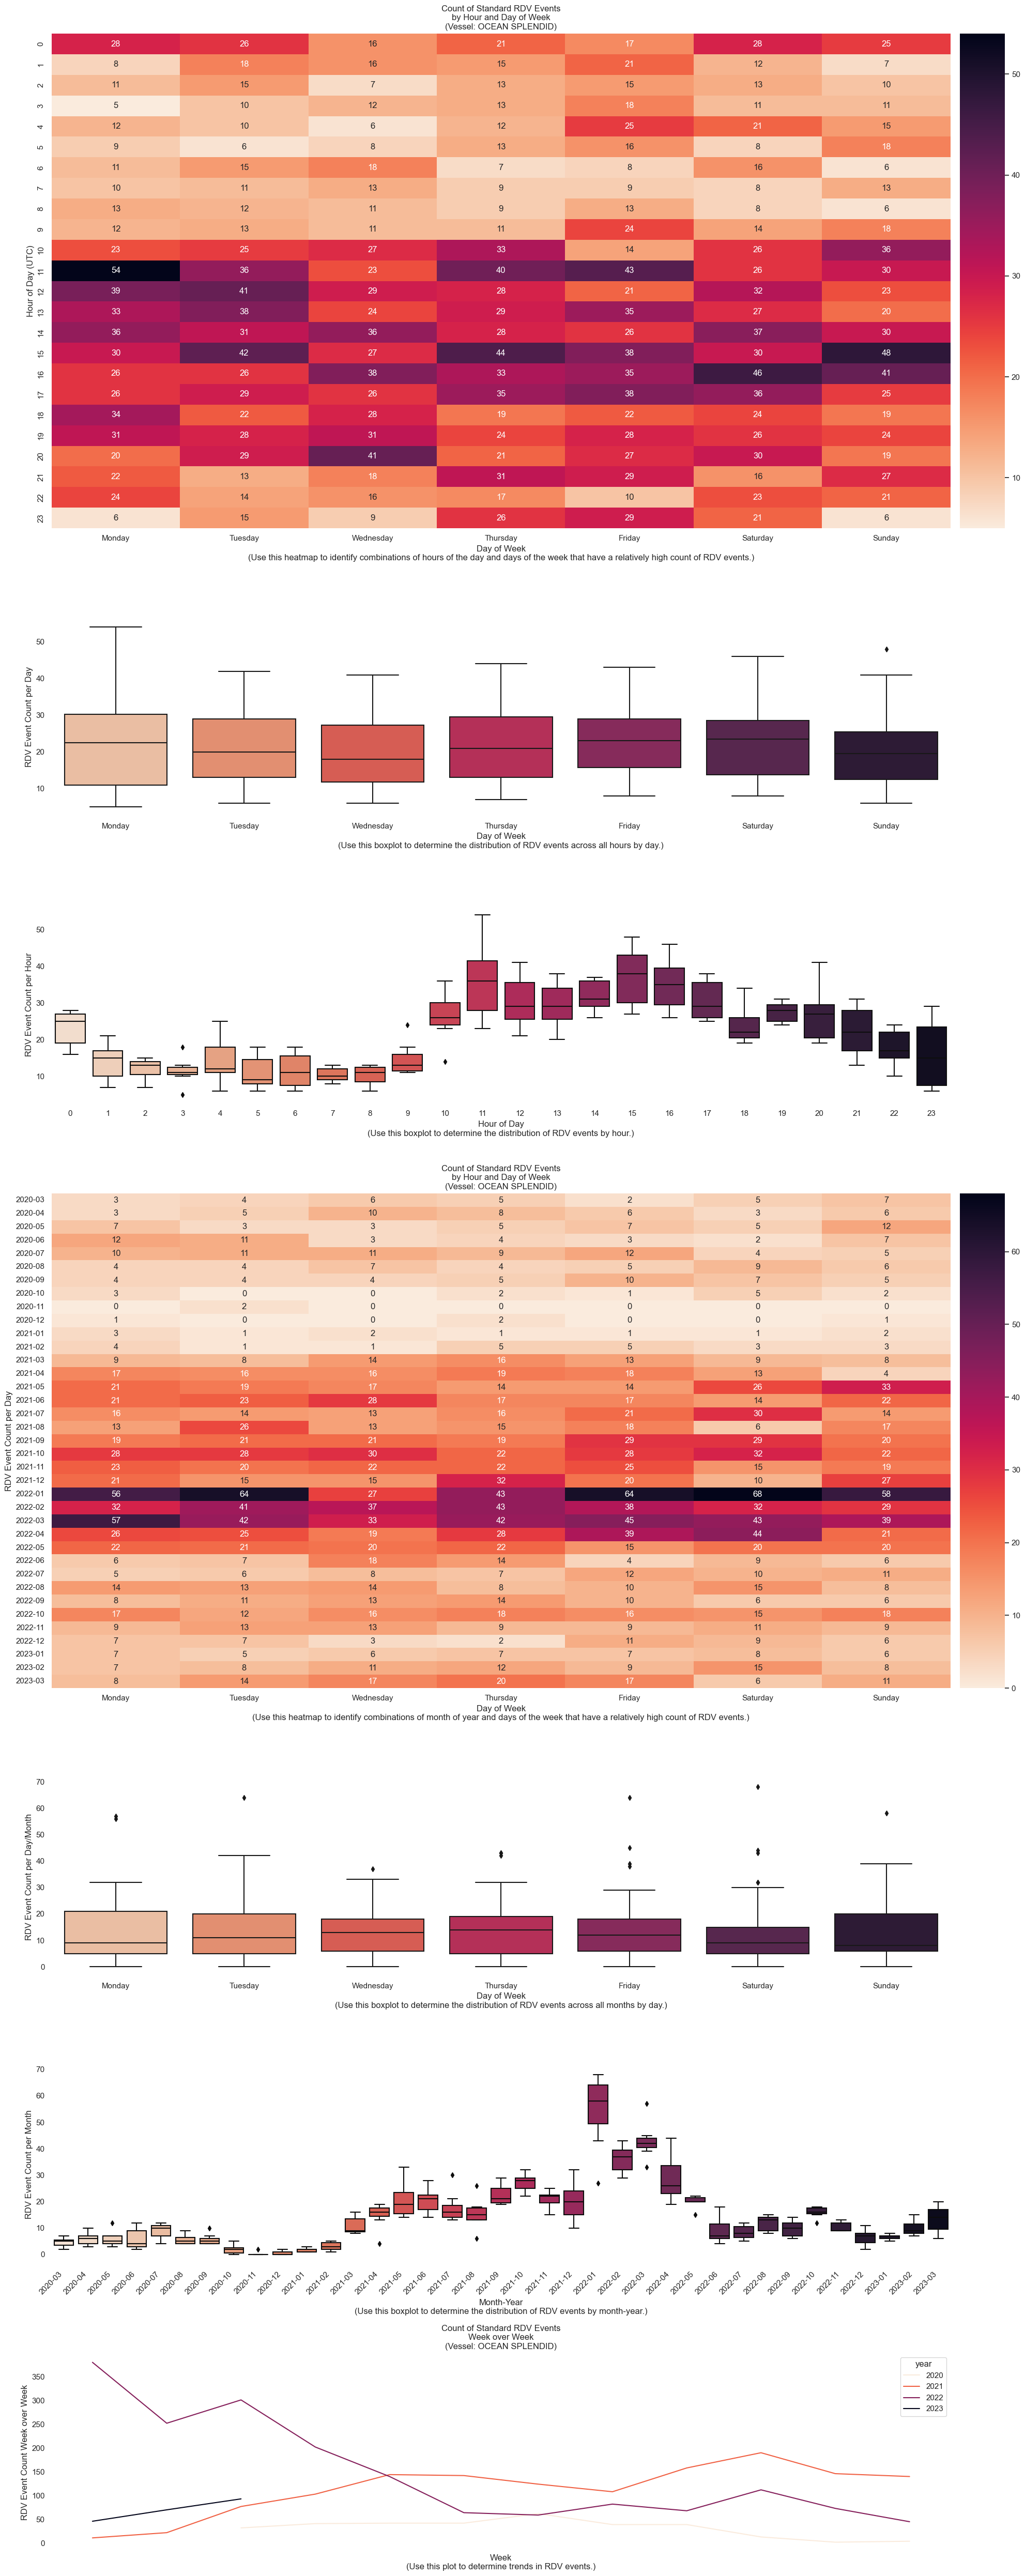

In [15]:
# Plots are output to plots directory
# For these charts we will look at the entire time period from 2020 to March 2023
heatmaps = get_plots(frame, node_of_interest)
heatmaps.show()

### Location Patterns

The maps below display the location of all RDV events in the dataframe passed for a node of interest. </br>
They can be used to assess patterns of location in time, patterns of location for dark vs standard rdv events, or areas of the highest density of events.

In [16]:
# The dots represent a single RDV event. Black dots represent dark RDV events and red dots represent standard RDV events.
# Hover over the dots to see more details.
get_map(frame, node_of_interest, color_type='rdv')

In [17]:
# The dots represent a single RDV event. The darker the dot, the more recent the event.
# Hover over the dots to see more details.
get_map(frame, node_of_interest, color_type='time')

In [18]:
# This heatmap will likely not populate on NIPR unless folium points to a local map server.
# Keeping here for off-network analyses.
# This map gives an idea of the general areas where RDV events most often occur (independent of time).
get_map(frame, node_of_interest, map_type='heatmap')